In [1]:
from bmadx.distgen_utils import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI
import os
import torch

n_part = 1_000_000
p0c = 43.36e6 # reference momentum in eV/c
import numpy as np


## generate gaussian beam distribution (with no z-pz correlation)

In [2]:
# create synthetic ground truth beam from base and transform yaml files
yaml_dir = os.path.join('data', 'yaml_files')
save_dir = os.path.join('data', 'gaussian_beam', 'low_E_spread')
gaussian_beam = create_beam(
    base_yaml = os.path.join(yaml_dir, 'gaussian.yaml'),
    transforms_yaml = os.path.join(yaml_dir, 'transforms-linear-no-z-E-corr.yaml'), 
    p0c = p0c,
    n_particle = n_part,
)
gaussian_beam.data = gaussian_beam.data * 0.25

# save beam
torch.save(gaussian_beam, "data/gaussian_beam.pt")

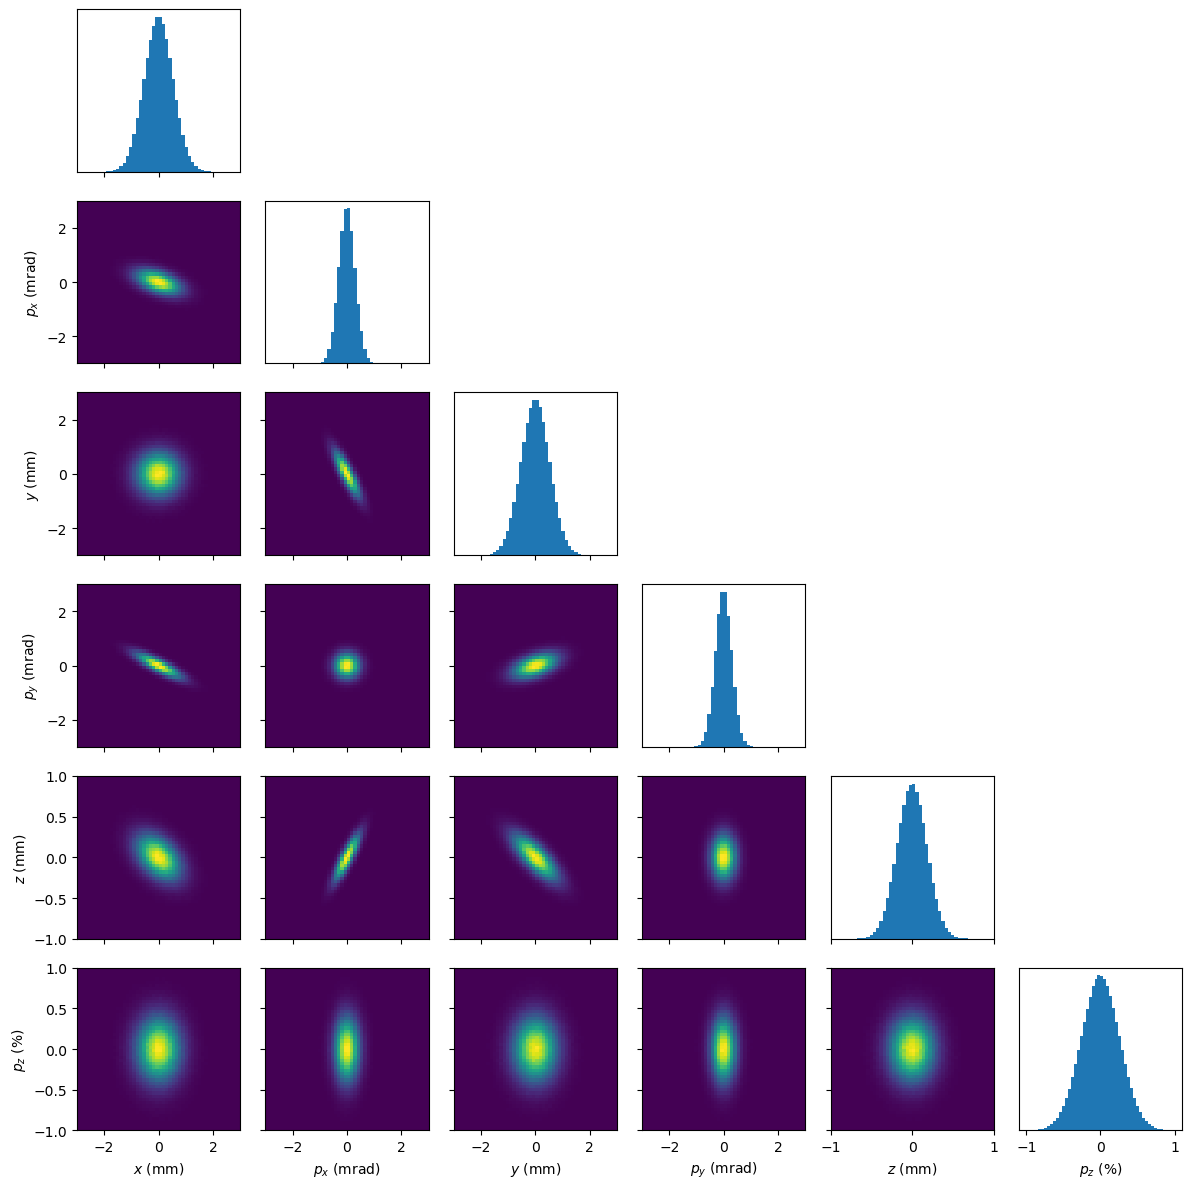

In [3]:
#plot gt beam
lims = np.array([[-15e-3, 15e-3],
                 [-15e-3, 15e-3],
                 [-15e-3, 15e-3],
                 [-15e-3, 15e-3],
                 [-5e-3, 5e-3],
                 [-5e-2, 5e-2]])*0.2
fig, ax = plot_projections(
    gaussian_beam.numpy_particles(),
    custom_lims = lims,
    background = 0
)

In [4]:
torch.det(torch.cov(gaussian_beam.data.T[:2]))**0.5 * gaussian_beam.p0c / 0.511e6

tensor(1.1778e-05)

## generate gaussian beam distribution (z-pz correlation)

In [5]:
# create synthetic ground truth beam from base and transform yaml files
gaussian_beam_w_E_corr = create_beam(
    base_yaml = os.path.join(yaml_dir, 'gaussian.yaml'),
    transforms_yaml = os.path.join(yaml_dir, 'transforms-linear.yaml'), 
    p0c = p0c,
    n_particle = n_part,
)

gaussian_beam_w_E_corr.data = gaussian_beam_w_E_corr.data * 0.25

torch.save(gaussian_beam_w_E_corr, "data/gaussian_beam_w_E_corr.pt")

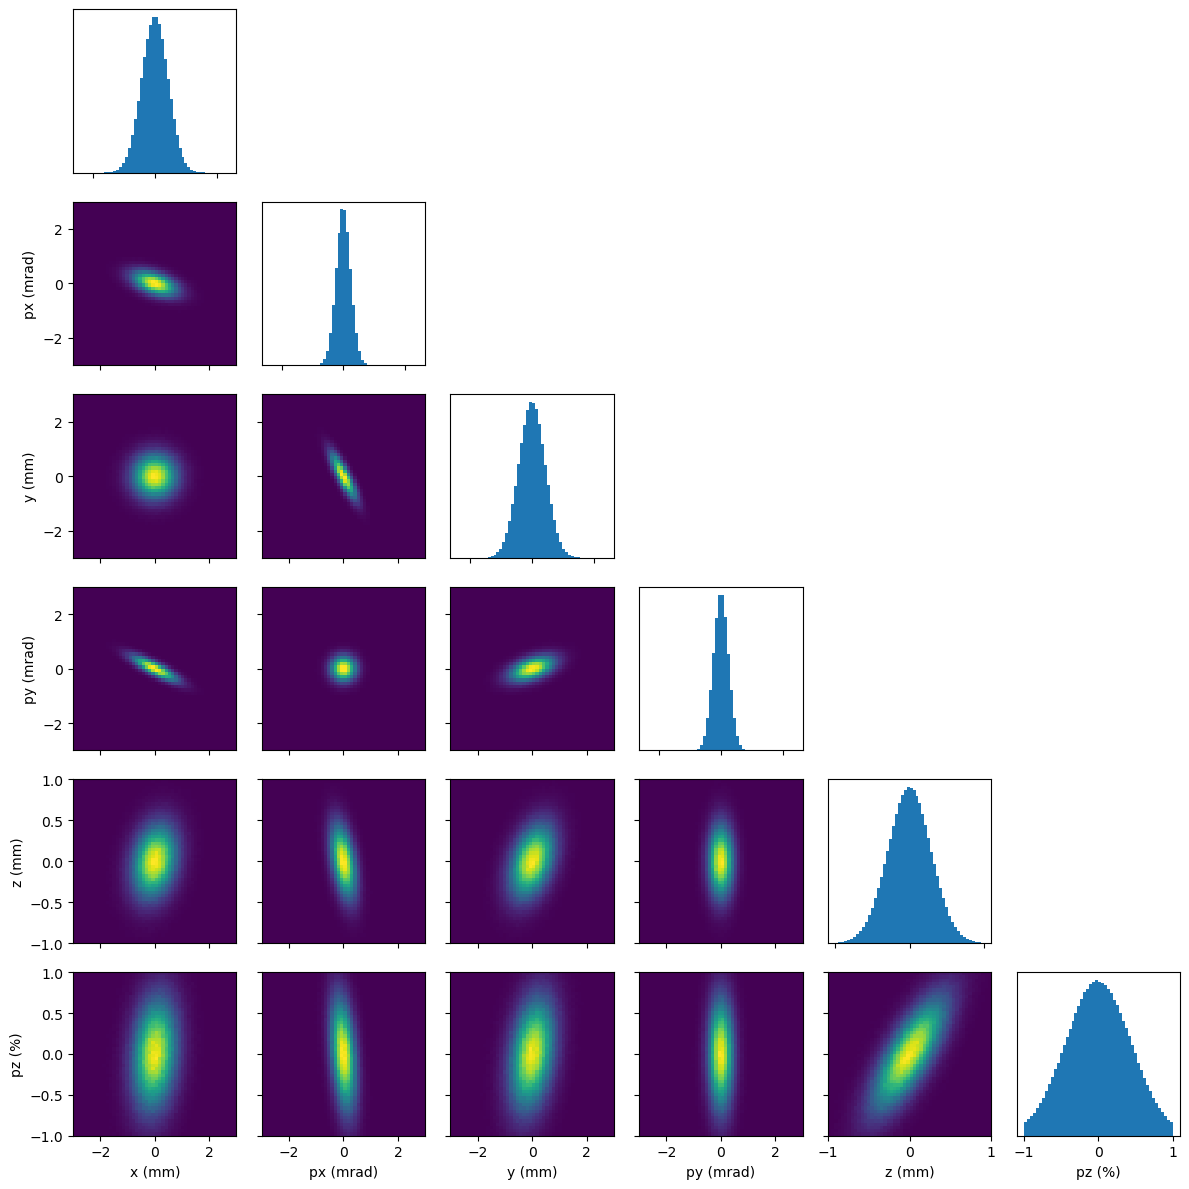

In [6]:
#plot gt beam
fig, ax = plot_projections(
    gaussian_beam_w_E_corr.numpy_particles(),
    custom_lims = lims,
    background = 0
)

## generate nonlinear beam distribution

In [7]:
# create synthetic ground truth beam from base and transform yaml files
nonlinear_beam = create_beam(
    base_yaml = os.path.join(yaml_dir, 'base.yaml'),
    transforms_yaml = os.path.join(yaml_dir, 'transforms-nonlinear.yaml'), 
    p0c = p0c,
    n_particle = n_part,
)

data = nonlinear_beam.data.clone()
nonlinear_beam.data = data * 0.25

torch.save(nonlinear_beam, "data/nonlinear_beam.pt")

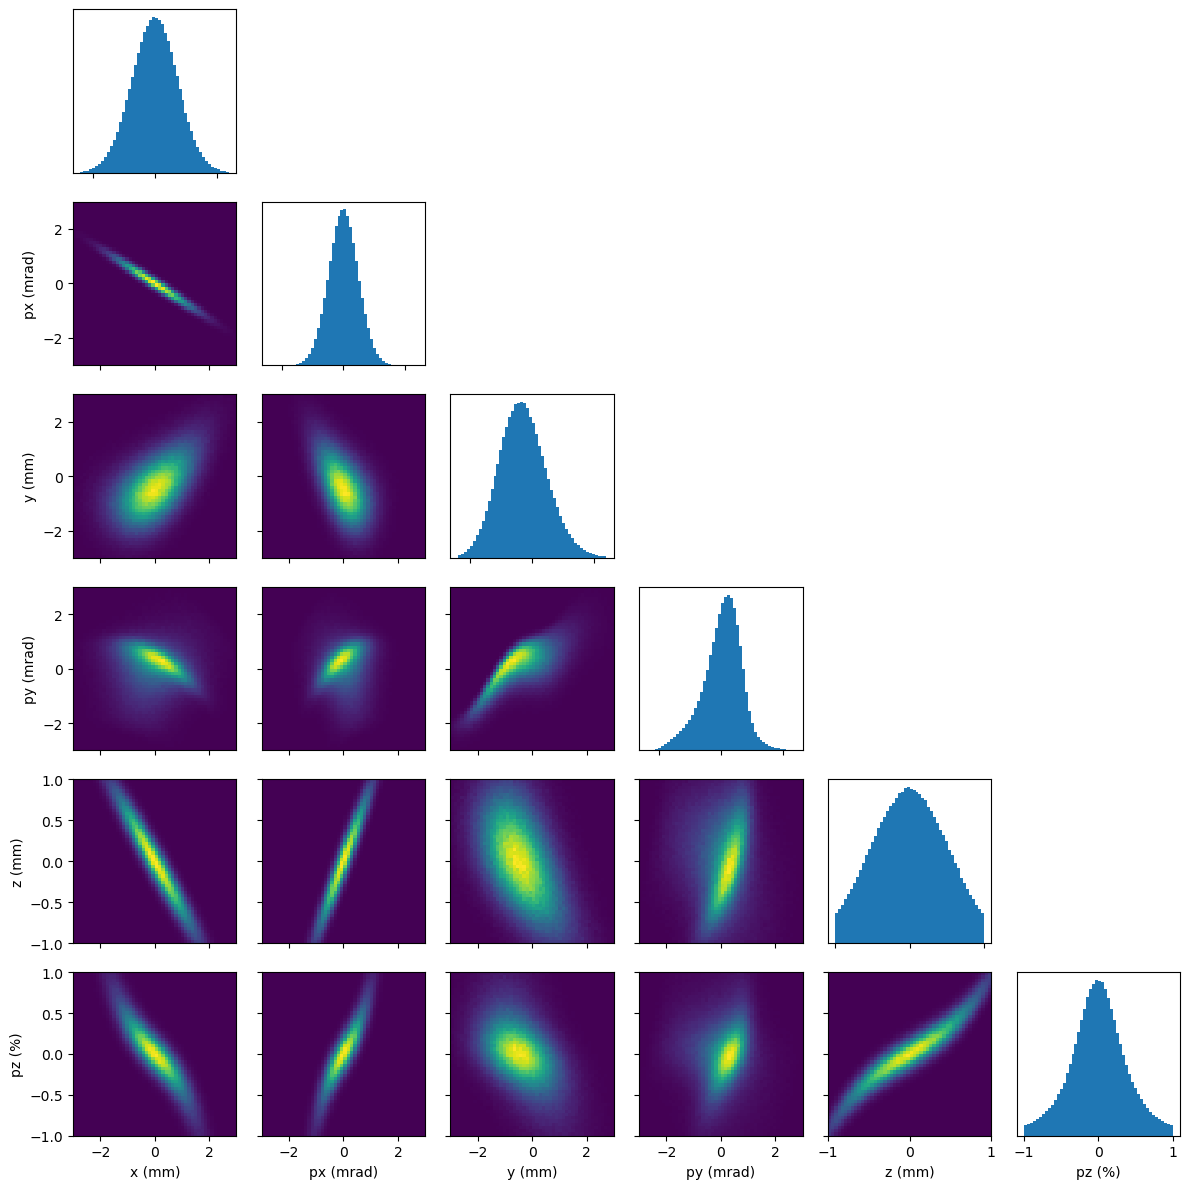

In [8]:
#plot gt beam
fig, ax = plot_projections(
    nonlinear_beam.numpy_particles(),
    custom_lims = lims,
    background = 0
)

In [9]:
nonlinear_beam.pz.std()

tensor(0.0052)

## EEX beam generation

In [2]:
#plot gt beam
eex_beam = create_beam(
    base_yaml = 'data/eex_beam/base.yaml',
    transforms_yaml = 'data/eex_beam/transforms.yaml',
    p0c = p0c,
    n_particle=1_000_000
)

# swap x-z distributions
data = eex_beam.data.clone()
data = torch.index_select(data, -1, torch.tensor([4,1,2,3,0,5]))
data[:,1] = data[:,1] * 0.5 - data[:,0]
data[:,-1] = data[:,-1] * 2.0
data[:,-2] = data[:,-2] * 3.0 - 1e-3
data[:,0] = data[:,0] + data[:,2]

eex_beam.data = data



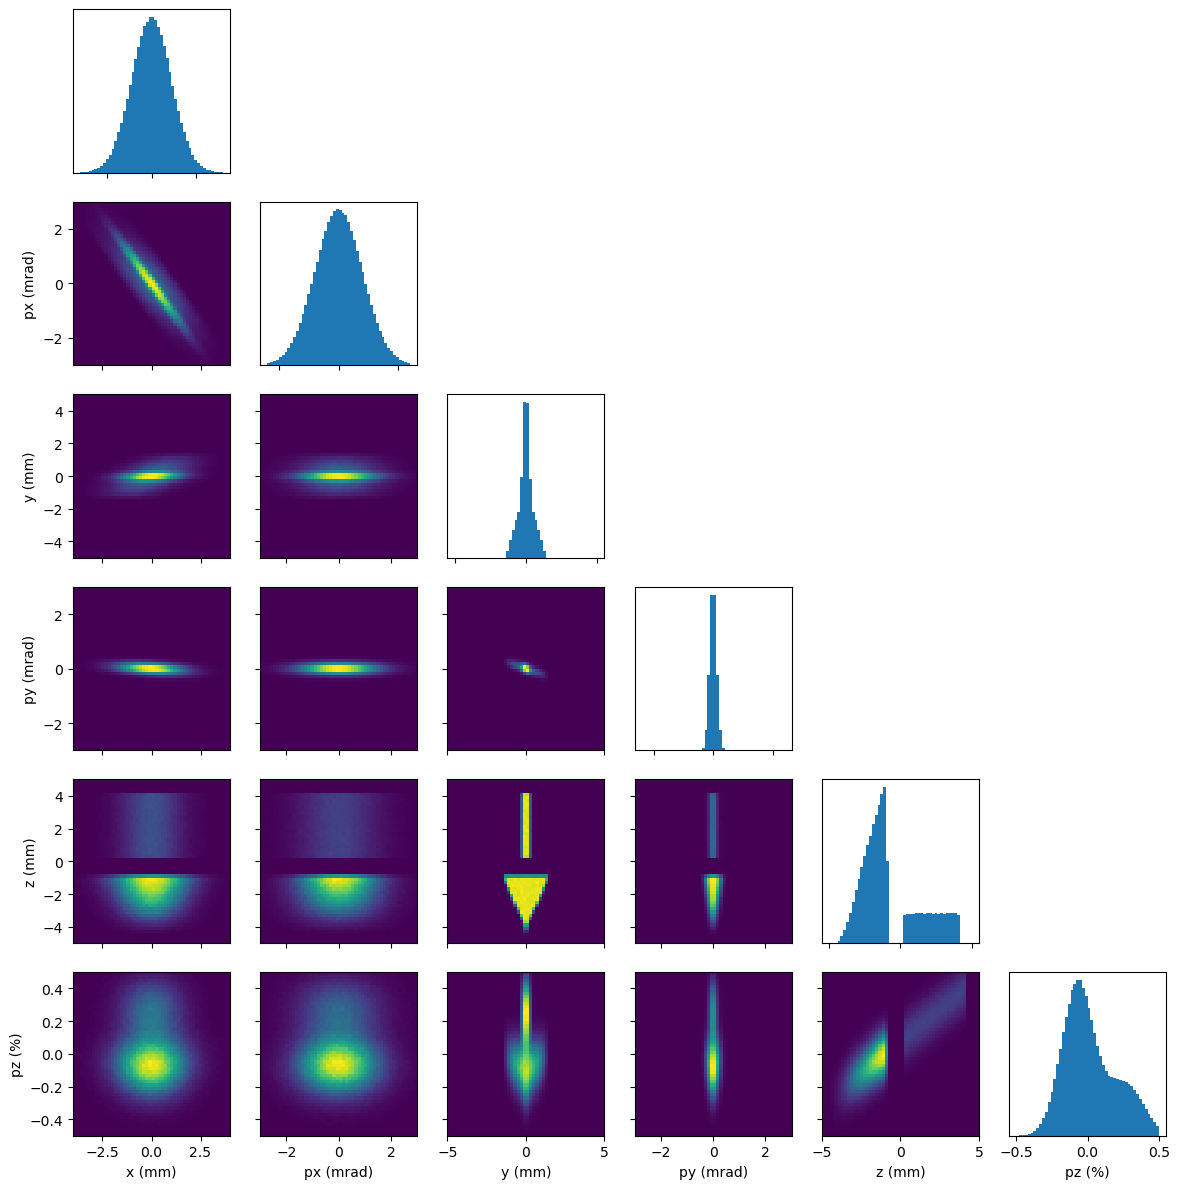

In [7]:
lims = np.array([[-4e-3, 4e-3],
                 [-3e-3, 3e-3],
                 [-5e-3, 5e-3],
                 [-3e-3, 3e-3],
                 [-5e-3, 5e-3],
                 [-5e-3, 5e-3]])

fig, ax = plot_projections(
    eex_beam.numpy_particles(),
    custom_lims=lims,
)
